In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_circles

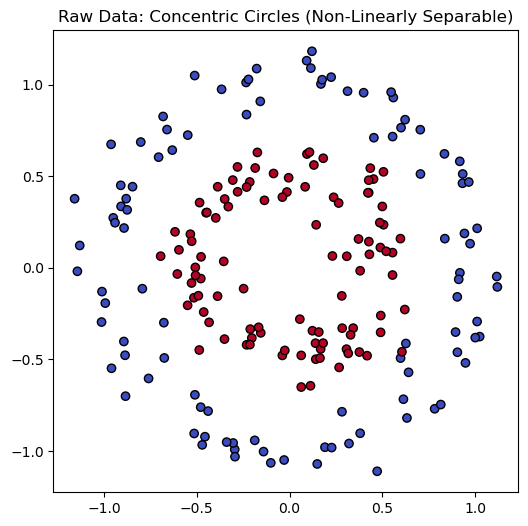

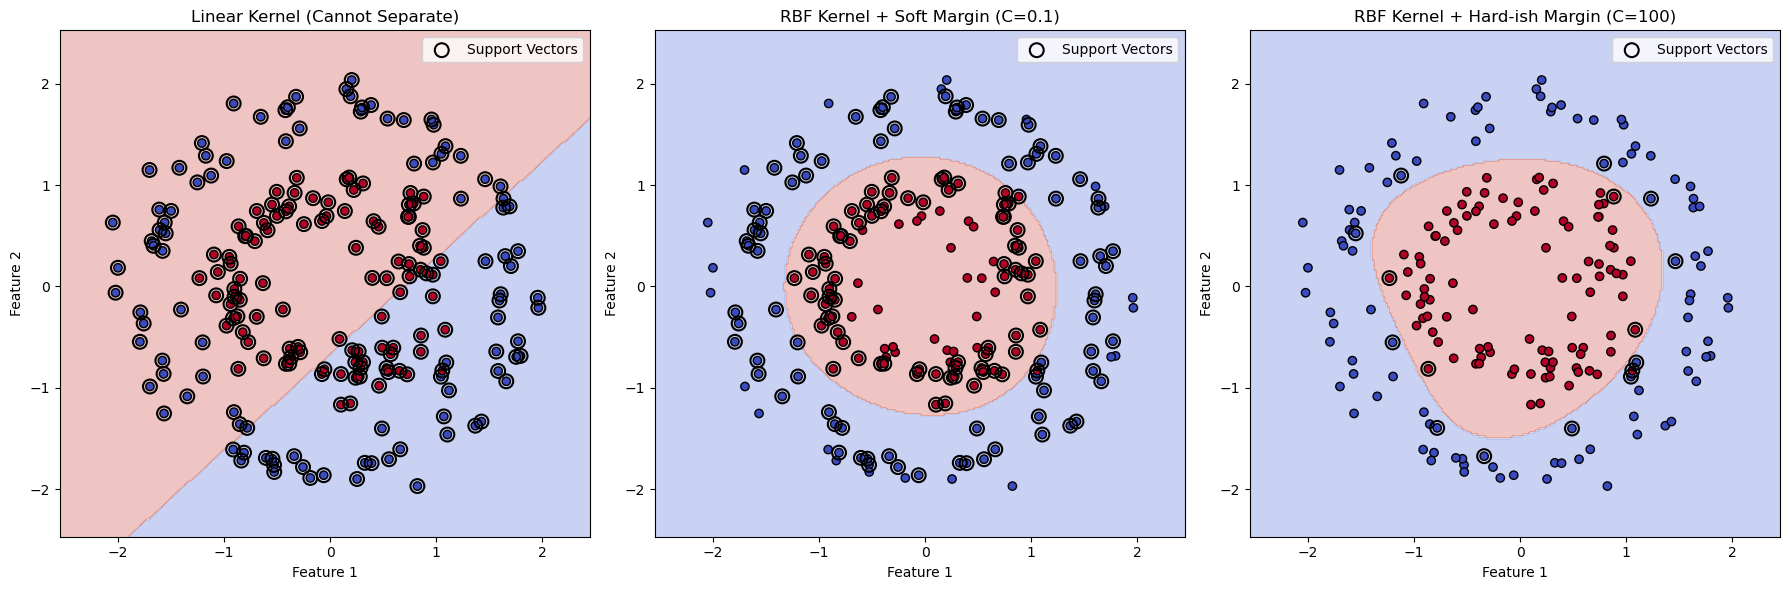

Linear: many support vectors (almost all points)
RBF C=0.1: more support vectors (smoother)
RBF C=100: fewer support vectors (fits tightly)


In [6]:
# Generate non-linear data: concentric circles
X, y = make_circles(
    n_samples=200,
    factor=0.5,
    noise=0.1,
    random_state=42
)


# Scale features (good practice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot data + decision boundary + support vectors
def plot_svm(model, X, y, title, ax=None):
    if ax is None:
        ax = plt.gca()
    
    # Create grid for contour
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Shade regions
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    # Support vectors
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='black',
               linewidth=1.5, label='Support Vectors')
    
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

# 1. Raw data scatter
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Raw Data: Concentric Circles (Non-Linearly Separable)")
plt.show()

# 2. Compare kernels and C values
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Linear kernel (fails completely)
model_linear = SVC(kernel='linear', C=1000)  # Even huge C can't help
model_linear.fit(X_scaled, y)
plot_svm(model_linear, X_scaled, y, "Linear Kernel (Cannot Separate)", axes[0])

# RBF kernel, small C (smooth, soft margin)
model_rbf_small = SVC(kernel='rbf', C=0.1, gamma='scale')
model_rbf_small.fit(X_scaled, y)
plot_svm(model_rbf_small, X_scaled, y, "RBF Kernel + Soft Margin (C=0.1)", axes[1])

# RBF kernel, large C (tight fit)
model_rbf_large = SVC(kernel='rbf', C=100, gamma='scale')
model_rbf_large.fit(X_scaled, y)
plot_svm(model_rbf_large, X_scaled, y, "RBF Kernel + Hard-ish Margin (C=100)", axes[2])

plt.tight_layout()
plt.show()

# Insight: Number of support vectors
print("Linear: many support vectors (almost all points)")
print("RBF C=0.1: more support vectors (smoother)")
print("RBF C=100: fewer support vectors (fits tightly)")